<a href="https://colab.research.google.com/github/RaysirChang/AI_Face_recgonition/blob/master/AI_face_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=1afa8a85f55aa244b19767bc95bbcc1b48d8c0ba49d168badec128ef5e232131
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition 
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Compare 2 images and return the result-- True/False 
def face_comp(img1,img2):
  known_image = face_recognition.load_image_file(img1) 
  biden_encoding = face_recognition.face_encodings(known_image)[0] 
  unknown_image = face_recognition.load_image_file(img2) 
  unknown_encoding= face_recognition.face_encodings(unknown_image)[0] 
  results = face_recognition.compare_faces([biden_encoding], unknown_encoding)
  return results 


In [ ]:
# Plot box and name on the image
def img_plt(image, name, face_locations):
  for top,right,bottom,left in face_locations:
      cv2.rectangle(image,(left,top),(right,bottom),(14,201,255),2)
      cv2.putText(image,name,(left, top-5),0,0.5,(0,255,255),1)
  return image 

In [ ]:
# Get the images from known and unknown
import os
knowns=os.listdir('/content/drive/My Drive/Colab Notebooks/known')
unknowns=os.listdir('/content/drive/My Drive/Colab Notebooks/unknown')

In [ ]:
# Get the known face encoding & name list 
known_encodings=[]
known_face_names=[]
for known in knowns:
  known_image = face_recognition.load_image_file('/content/drive/My Drive/Colab Notebooks/known/'+known) 
  face_locations = face_recognition.face_locations(known_image)
  face_encodings = face_recognition.face_encodings(known_image,face_locations)[0]
  known_encodings.append(face_encodings)
  known_face_names.append(known.split('.')[0])

In [ ]:
# Get the unknown face encoding
unknown_encodings=[]
unknown_images=[]
face_locations=[]
for unknown in unknowns:
 if unknown.lower().endswith('.jpg'): 
  unknown_image = face_recognition.load_image_file('/content/drive/My Drive/Colab Notebooks/unknown/'+unknown) 
  face_location = face_recognition.face_locations(unknown_image)
  face_encodings = face_recognition.face_encodings(unknown_image, face_location)[0]
  unknown_encodings.append(face_encodings)
  unknown_images.append(unknown_image)
  face_locations.append(face_location)

In [ ]:
# Check the face in unknown folder by "face_distances" function
for unknown_image in unknown_images: 
  image=unknown_image.copy() #To prevent the unknown_image be modified
  face_locations = face_recognition.face_locations(image)
  for face_location in face_locations:
    face_encodings = face_recognition.face_encodings(image, [face_location])[0]
    face_distances = face_recognition.face_distance(known_encodings, face_encodings)
    best_match_index = np.argmin(face_distances)
    name = known_face_names[best_match_index]
    image=img_plt(image,name,[face_location])
  cv2_imshow(image[:,:,::-1])
cv2.destroyAllWindows()    

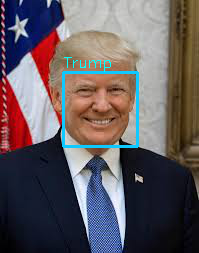

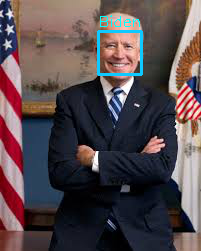

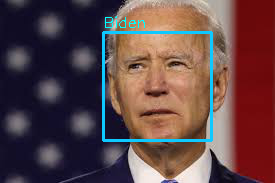

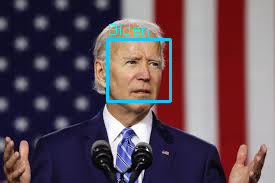

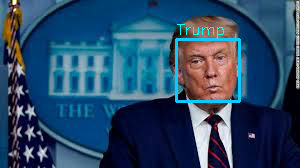

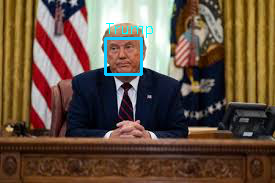

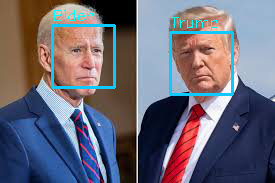

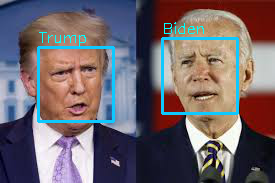

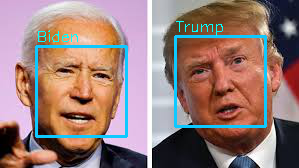

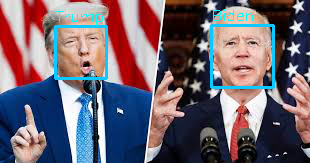

In [ ]:
# Check the face in unknown folder by "compare_faces" function
for unknown_image in unknown_images: 
  image=unknown_image.copy() #To prevent the unknown_image be modified
  face_locations = face_recognition.face_locations(image)
  for face_location in face_locations:
    face_encodings = face_recognition.face_encodings(image, [face_location])[0]
    results = face_recognition.compare_faces(known_encodings, face_encodings)
    res=np.array(results)
    idx=np.where(res==True)
    if len(idx[0])!=0: #check if there is known people
      name = known_face_names[idx[0][0]]
      image=img_plt(image,name,[face_location])
  cv2_imshow(image[:,:,::-1])
cv2.destroyAllWindows() 